In [33]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [34]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [35]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [36]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

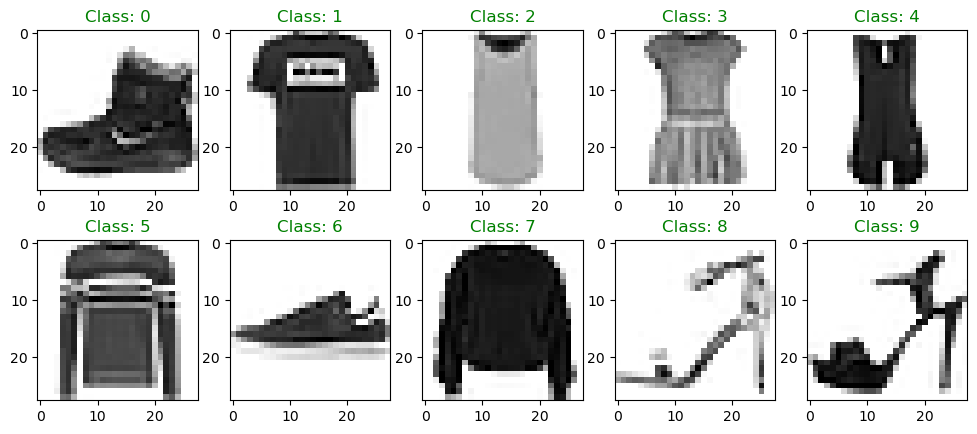

In [37]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = x_train[i]
    plt.imshow(img, cmap='binary')
    plt.title("Class: " + str(i), c='g')   
plt.show()

In [38]:
model = Sequential(name='fashion_mnist')

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001), name='hidden_1'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001), name='hidden_2'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', name='output'))

In [39]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 7, 7, 64)        

In [40]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

#Train model
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=24,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Epoch 1/24
235/235 [==============================] - 105s 439ms/step - loss: 0.8318 - accuracy: 0.7337 - val_loss: 1.2136 - val_accuracy: 0.8193
Epoch 2/24
235/235 [==============================] - 99s 421ms/step - loss: 0.5790 - accuracy: 0.8311 - val_loss: 0.5825 - val_accuracy: 0.8475
Epoch 3/24
235/235 [==============================] - 97s 411ms/step - loss: 0.5176 - accuracy: 0.8530 - val_loss: 0.4626 - val_accuracy: 0.8715
Epoch 4/24
235/235 [==============================] - 96s 409ms/step - loss: 0.4769 - accuracy: 0.8657 - val_loss: 0.4395 - val_accuracy: 0.8780
Epoch 5/24
235/235 [==============================] - 96s 410ms/step - loss: 0.4490 - accuracy: 0.8770 - val_loss: 0.4297 - val_accuracy: 0.8840
Epoch 6/24
235/235 [==============================] - 97s 413ms/step - loss: 0.4233 - accuracy: 0.8850 - val_loss: 0.4077 - val_accuracy: 0.8865
Epoch 7/24
235/235 [==============================] - 97s 412ms/step - loss: 0.4048 - accuracy: 0.8908 - val_loss: 0.3887 - val_a

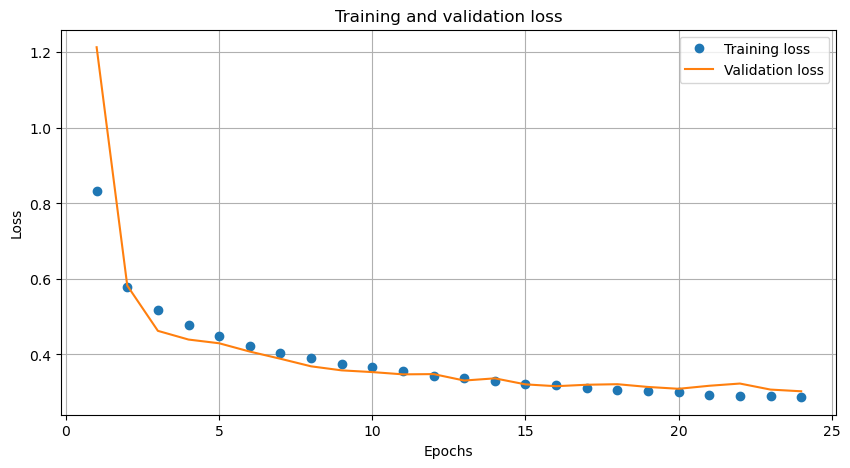

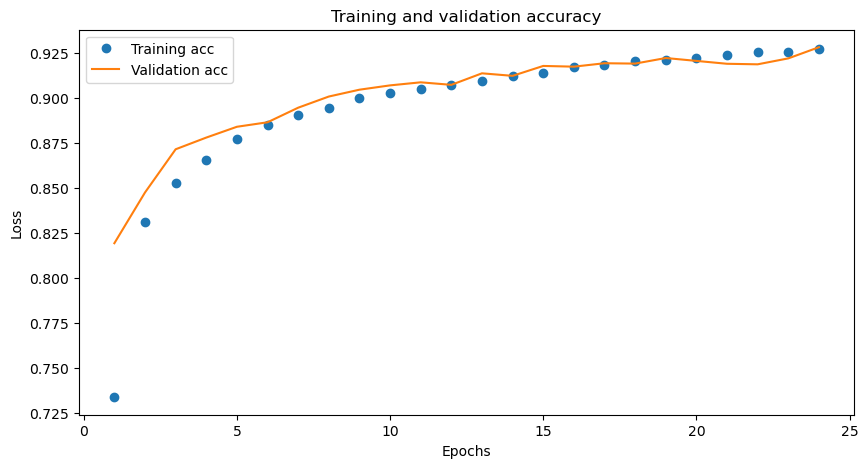

In [46]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(epochs, loss_values, 'o', label='Training loss')
plt.plot(epochs, val_loss_values,  label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, history_dict['accuracy'], 'o', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'],  label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Загалом, згорткові мережі мають здатність до здійснення більш точної класифікації зображень, оскільки вони здатні виявляти локальні залежності в даних, які можуть бути недоступні для багатошарових мереж. Таким чином, краще підходять для задач обробки зображень, розпізнавання об'єктів або класифікація зображень.